In [16]:
# Import des librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from   statsmodels.compat import lzip
from   statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.stattools

import scipy.stats as st
import scipy
from   scipy.stats import ks_2samp
import math
import random
import time

import matplotlib.mlab as mlab
import matplotlib.lines as mlines
from scipy.stats import norm

from statsmodels import graphics

In [45]:
rhonealpes = pd.read_excel(r'C:\Users\Asus\Desktop\energie\rhonealpes.xlsx')            
rhonealpes

NameError: name 'pd' is not defined

In [22]:
rhonealpes.columns

Index(['Périmètre', 'Nature', 'Date', 'Heures', 'Consommation', 'Thermique',
       'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'Ech. physiques',
       'Flux physiques d'Auvergne-Rhône-Alpes vers Auvergne-Rhône-Alpes',
       'Flux physiques de Bourgogne-Franche-Comté vers Auvergne-Rhône-Alpes',
       'Flux physiques de Bretagne vers Auvergne-Rhône-Alpes',
       'Flux physiques de Centre-Val de Loire vers Auvergne-Rhône-Alpes',
       'Flux physiques de Grand-Est vers Auvergne-Rhône-Alpes',
       'Flux physiques de Hauts-de-France vers Auvergne-Rhône-Alpes',
       'Flux physiques d'Ile-de-France vers Auvergne-Rhône-Alpes',
       'Flux physiques de Normandie vers Auvergne-Rhône-Alpes',
       'Flux physiques de Nouvelle-Aquitaine vers Auvergne-Rhône-Alpes',
       'Flux physiques d'Occitanie vers Auvergne-Rhône-Alpes',
       'Flux physiques de Pays-de-la

In [29]:
rhonealpes = energie[['Périmètre', 'Date', 'Consommation', 'Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']]
rhonealpes

,Périmètre,Date,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
0,Auvergne-Rhône-Alpes,2022-01-01,7668.0,190.0,9419.0,38.0,0.0,3184.0,124.0
1,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Auvergne-Rhône-Alpes,2022-01-01,7705.0,194.0,8708.0,39.0,0.0,4159.0,122.0
3,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Auvergne-Rhône-Alpes,2022-01-01,7500.0,194.0,8508.0,68.0,0.0,3875.0,122.0
...,...,...,...,...,...,...,...,...,...
35035,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Auvergne-Rhône-Alpes,2022-12-31,6505.0,162.0,7903.0,446.0,0.0,3682.0,119.0
35037,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Auvergne-Rhône-Alpes,2022-12-31,6057.0,163.0,7877.0,449.0,0.0,3450.0,120.0


In [31]:
energie.isnull().sum()

Périmètre           0
Date                0
Consommation    17520
Thermique       17520
Nucléaire       17520
Eolien          17520
Solaire         17520
Hydraulique     17520
Bioénergies     17520
dtype: int64

In [33]:
#les lignes contenant les valeurs manquantes 
energie[energie.isnull().any(axis=1)]


,Périmètre,Date,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
1,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Auvergne-Rhône-Alpes,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35031,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35033,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35035,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35037,Auvergne-Rhône-Alpes,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#suppression des lignes contenant les valeurs manquantes
rhonealpes = rhonealpes.dropna()
rhonealpes

NameError: name 'rhonealpes' is not defined

In [46]:
rhonealpes['Date'] = pd.to_datetime(rhonealpes['Date'])

In [52]:
#ajout d'une nouvelle colonne mois
rhonealpes['Mois'] = rhonealpes['Date'].dt.to_period('M')  # Extrait l'année et le mois

In [60]:
#calcul de la somme de consommation par mois
consommation_totale_par_mois = rhonealpes.groupby('Mois')['Consommation'].sum()

In [58]:
print(consommation_totale_par_mois)

Mois
2022-01    14929790.0
2022-02    12288044.0
2022-03    12033292.0
2022-04    10298412.0
2022-05     9203291.0
2022-06     9165832.0
2022-07     9549063.0
2022-08     8773380.0
2022-09     8984444.0
2022-10     9025544.0
2022-11    10347997.0
2022-12    12426836.0
Freq: M, Name: Consommation, dtype: float64


In [29]:
# Sélectionner seulement les colonnes "Mois_nom" et "Consommation"
consommation_totale_par_mois = consommation_totale_par_mois[['Mois_nom', 'Consommation']]

# Réinitialiser l'index pour supprimer les numéros d'index
consommation_totale_par_mois = consommation_totale_par_mois.reset_index(drop=True)

# Afficher le résultat
print(consommation_totale_par_mois)


NameError: name 'consommation_totale_par_mois' is not defined

In [27]:
# Calculer la production totale pour chaque source d'énergie par mois
production_totale_par_mois = rhonealpes.groupby('Mois_nom')[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].sum().reset_index()

# Ajouter l'ordre des mois pour trier par mois
mois_ordre = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
production_totale_par_mois['Mois_num'] = production_totale_par_mois['Mois_nom'].map(mois_ordre)

# Trier les données par ordre chronologique
production_totale_par_mois = production_totale_par_mois.sort_values('Mois_num')

# Supprimer la colonne 'Mois_num' car elle n'est plus nécessaire
production_totale_par_mois = production_totale_par_mois.drop(columns=['Mois_num'])

# Réinitialiser l'index
production_totale_par_mois = production_totale_par_mois.reset_index(drop=True)

# Afficher le résultat
print(production_totale_par_mois)


NameError: name 'rhonealpes' is not defined

In [21]:
# Fusionner la consommation totale par mois avec la production totale par mois
resultat = pd.merge(consommation_totale_par_mois, production_totale_par_mois, on='Mois_nom', how='left')

# Afficher le résultat
print(resultat)

NameError: name 'pd' is not defined

In [15]:
# Exporter en fichier Excel
resultat.to_excel('rhonesalpes.xlsx', index=False)
print("Le tableau a été exporté avec succès sous le nom 'resultat_fusion.xlsx'.")


NameError: name 'resultat' is not defined

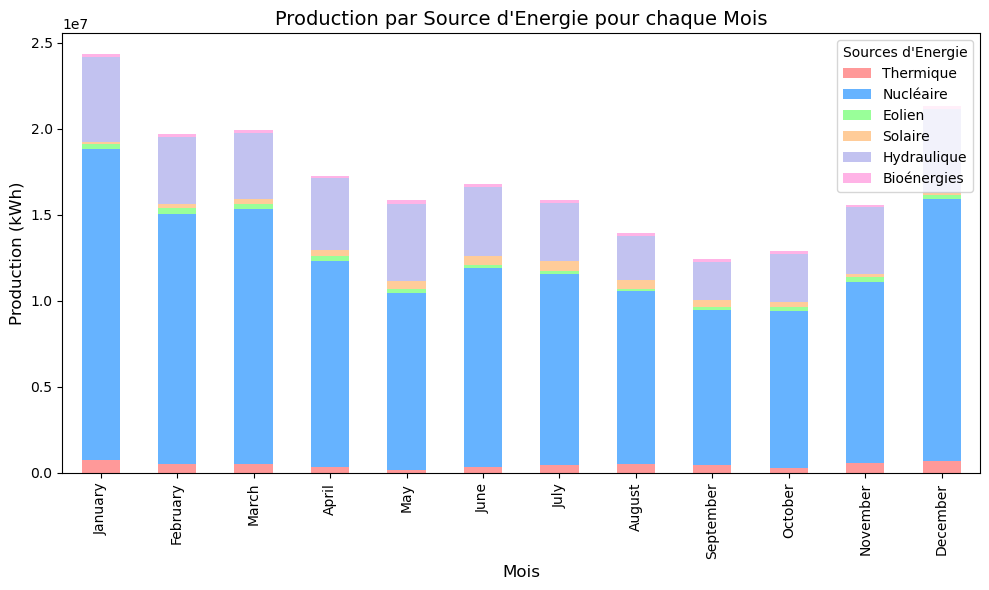

In [138]:

# Définir les couleurs 
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# création du graphique 
ax = resultat.set_index('Mois_nom')[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Ajouter des labels et des filtres
plt.title('Production par Source d\'Energie pour chaque Mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Production (kWh)', fontsize=12)

# la légende
plt.legend(title='Sources d\'Energie')

# le graphique
plt.tight_layout()
plt.savefig('production_par_source_denergie.png', format='png')
plt.show()


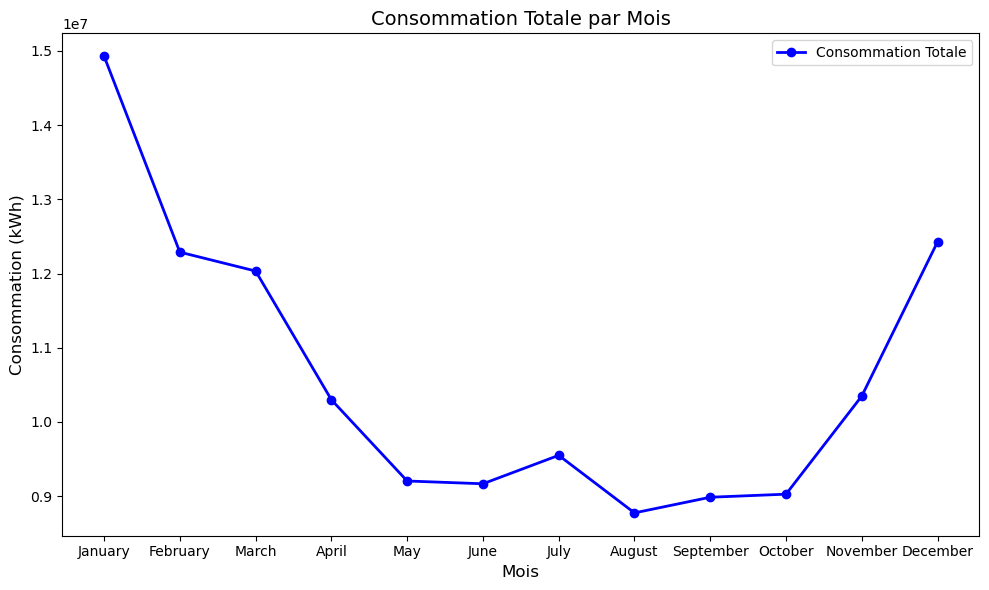

In [136]:
# la consommation totale par mois
plt.figure(figsize=(10, 6))
plt.plot(resultat['Mois_nom'], resultat['Consommation'], label='Consommation Totale', color='blue', marker='o', linestyle='-', linewidth=2)

# les labels et le titre
plt.title('Consommation Totale par Mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Consommation (kWh)', fontsize=12)

# la légende
plt.legend()

# le graphique
plt.tight_layout()

plt.savefig('consommation_totale_par_mois.png', format='png')
plt.show()


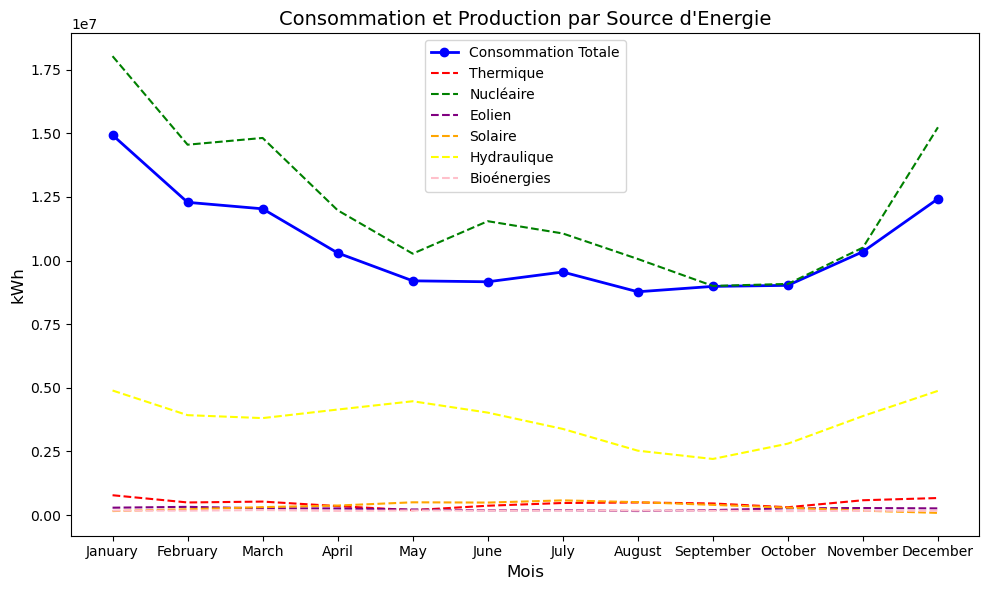

In [134]:
# Créer le graphique combiné pour comparer la consommation et la production par source
plt.figure(figsize=(10, 6))

# Tracer la consommation totale par mois
plt.plot(resultat['Mois_nom'], resultat['Consommation'], label='Consommation Totale', color='blue', marker='o', linestyle='-', linewidth=2)

# Tracer la production totale par source d'énergie
plt.plot(resultat['Mois_nom'], resultat['Thermique'], label='Thermique', color='red', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Nucléaire'], label='Nucléaire', color='green', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Eolien'], label='Eolien', color='purple', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Solaire'], label='Solaire', color='orange', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Hydraulique'], label='Hydraulique', color='yellow', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Bioénergies'], label='Bioénergies', color='pink', linestyle='--')

# Ajouter les labels et le titre
plt.title('Consommation et Production par Source d\'Energie', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('kWh', fontsize=12)

# Ajouter la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.savefig('consommation_prod.png', format='png')
plt.show()


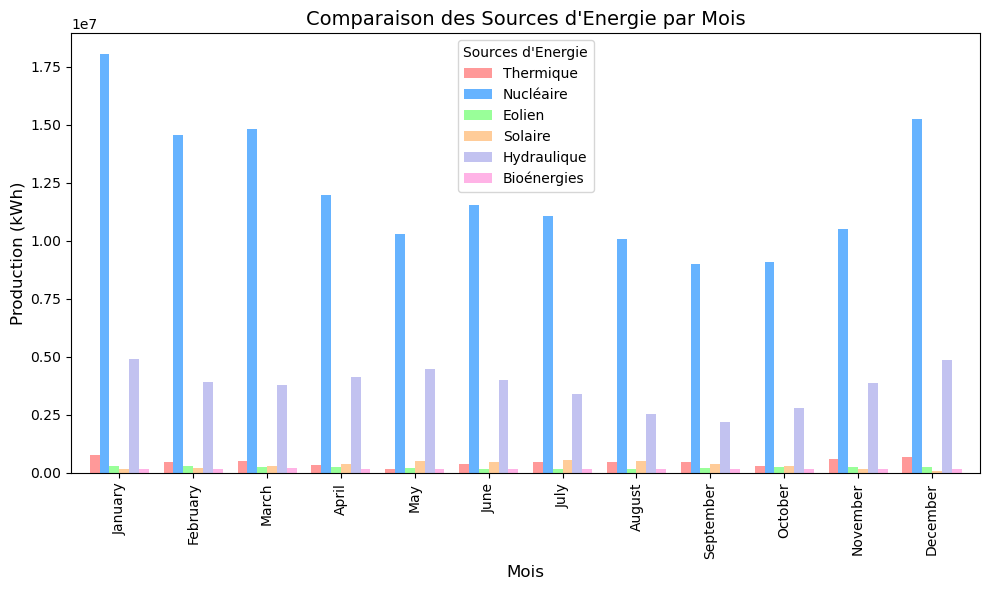

In [132]:
# Créer un DataFrame qui contient les mois et les sources d'énergie
df_sources = resultat[['Mois_nom', 'Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']]

# Créer un graphique à barres comparatives
df_sources.set_index('Mois_nom').plot(kind='bar', figsize=(10, 6), width=0.8, color=colors)

# Ajouter les labels et le titre
plt.title('Comparaison des Sources d\'Energie par Mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Production (kWh)', fontsize=12)

# Ajouter la légende
plt.legend(title='Sources d\'Energie')

# Afficher le graphique
plt.tight_layout()
plt.savefig('comparaison.png', format='png')
plt.show()

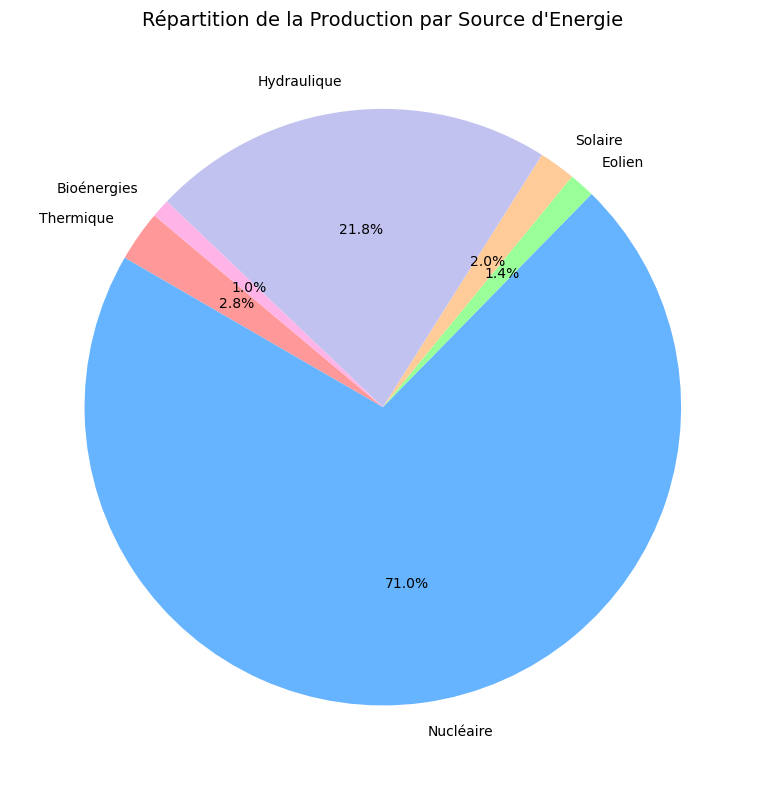

In [130]:
# Calculer la production totale par mois
total_production = resultat[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].sum()

# Créer un graphique circulaire pour la part de chaque source d'énergie
plt.figure(figsize=(8, 8))
plt.pie(total_production, labels=total_production.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Ajouter le titre
plt.title('Répartition de la Production par Source d\'Energie', fontsize=14)

# Afficher le graphique
plt.tight_layout()

plt.savefig('répartitiondeproduction.png', format='png')
plt.show()
